Linear Regression Mean Squared Error: 116605408.29908063
Linear Regression R-squared: 0.9983797757733922


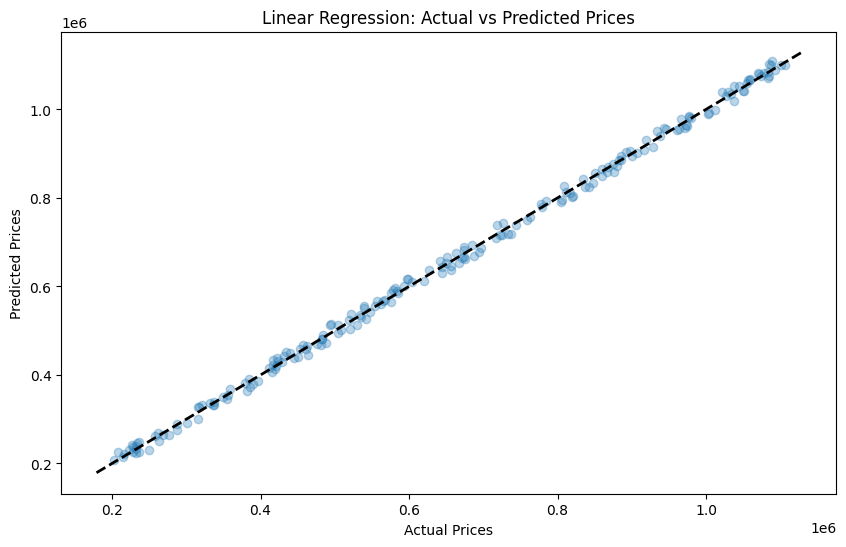

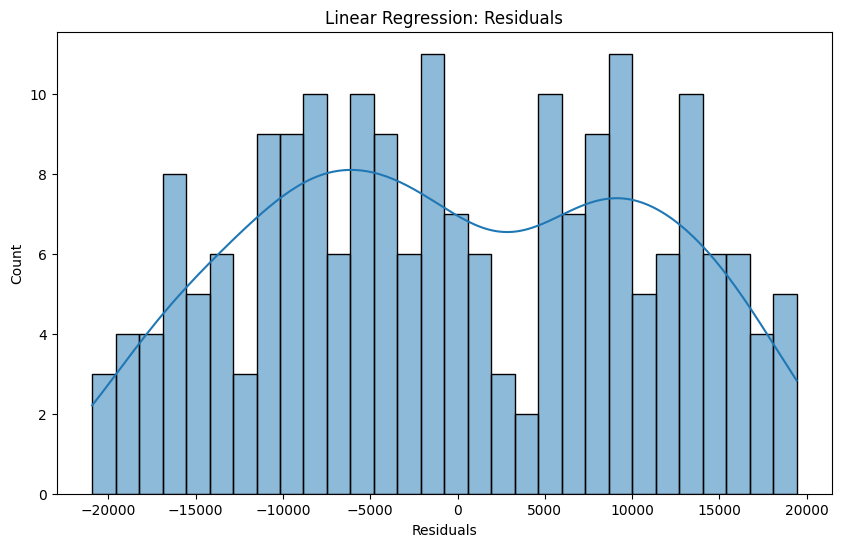

Random Forest Mean Squared Error: 204950787.72434798
Random Forest R-squared: 0.997152222728112


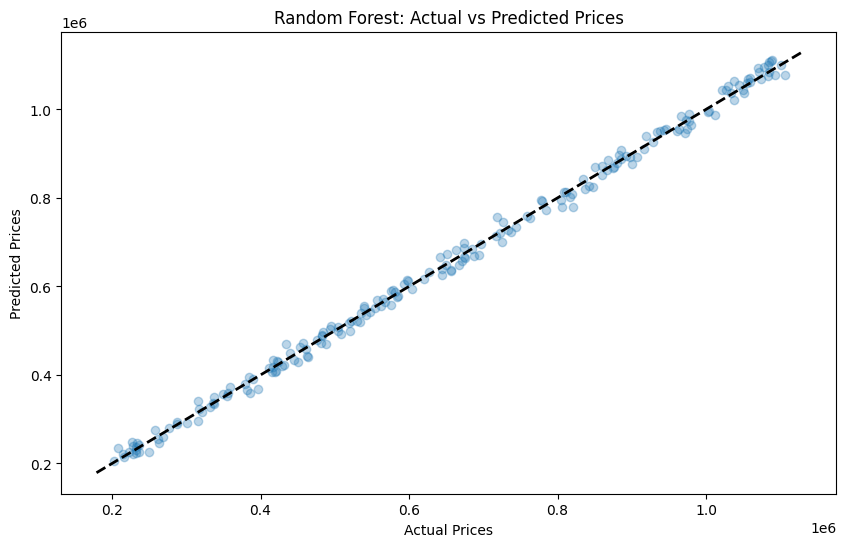

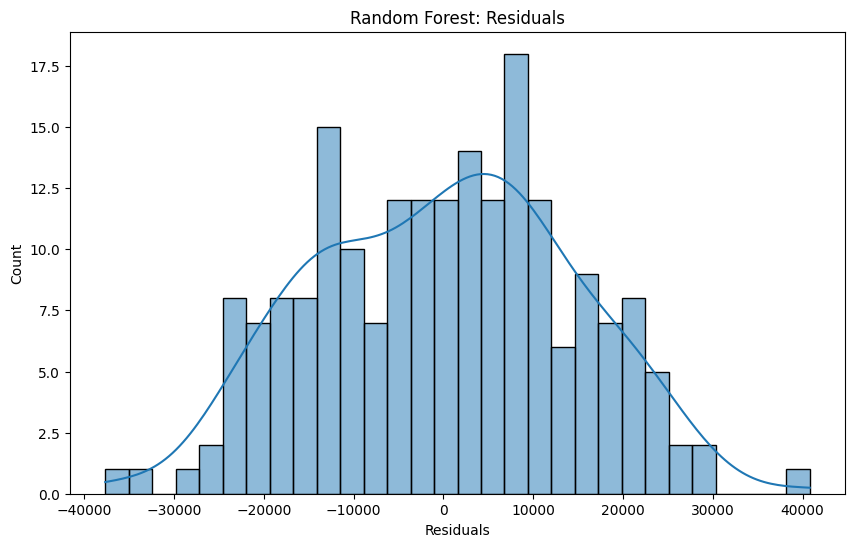

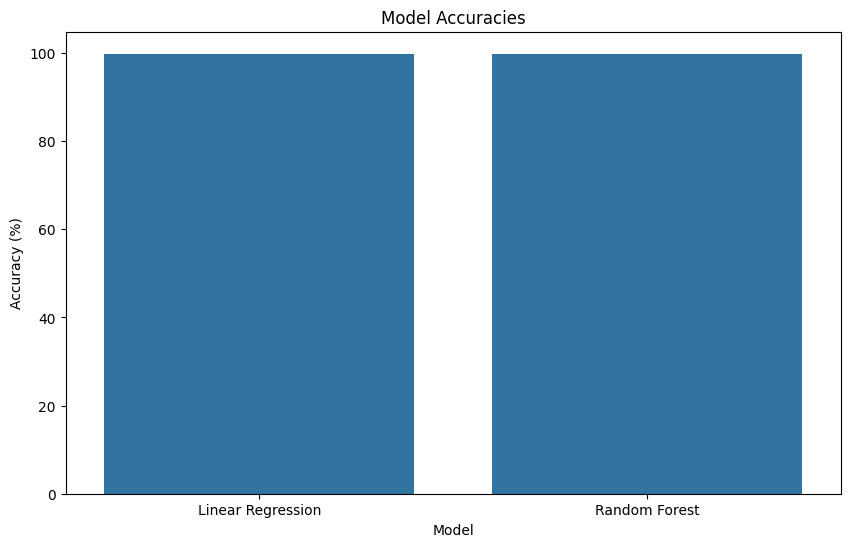

Linear Regression Accuracy: 99.84%
Random Forest Accuracy: 99.72%
Linear Regression Predictions: [508794.25004735 822283.3212685 ]
Random Forest Predictions: [505912.51 816439.86]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Data cleaning
df = df.dropna()
df = pd.get_dummies(df, columns=['location'], drop_first=True)

# Feature engineering
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training and evaluation - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

# Plotting predicted vs actual prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Plotting residuals for Linear Regression
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Linear Regression: Residuals')
plt.show()

# Model training and evaluation - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

# Plotting predicted vs actual prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Plotting residuals for Random Forest
rf_residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Random Forest: Residuals')
plt.show()

# Calculate and plot model accuracies
accuracy_lr = r2_lr * 100
accuracy_rf = r2_rf * 100

# Create a DataFrame for the accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared': [r2_lr, r2_rf],
    'Mean Squared Error': [mse_lr, mse_rf],
    'Accuracy (%)': [accuracy_lr, accuracy_rf]
})

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy (%)', data=accuracy_df)
plt.title('Model Accuracies')
plt.show()

print(f'Linear Regression Accuracy: {accuracy_lr:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}%')

# Predicting new data
# Assuming new data is in a DataFrame `new_data`
new_data = pd.DataFrame({
    'size': [1500, 2500],  # Example sizes
    'bedrooms': [3, 4],    # Example number of bedrooms
    'bathrooms': [2, 3],   # Example number of bathrooms
    'location': ['A', 'C'], # Example locations
    'age': [10, 20]        # Example ages
})

# Preprocess new data
new_data = pd.get_dummies(new_data, columns=['location'], drop_first=True)
new_data = new_data.reindex(columns=X.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained Linear Regression model
new_predictions_lr = model.predict(new_data_scaled)
print(f'Linear Regression Predictions: {new_predictions_lr}')

# Make predictions using the trained Random Forest model
new_predictions_rf = rf_model.predict(new_data_scaled)
print(f'Random Forest Predictions: {new_predictions_rf}')


In [2]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Generate random data
sizes = np.random.randint(500, 3500, num_samples)  # Square feet
bedrooms = np.random.randint(1, 6, num_samples)    # Number of bedrooms
bathrooms = np.random.randint(1, 4, num_samples)   # Number of bathrooms
locations = np.random.choice(['A', 'B', 'C'], num_samples)  # Locations
ages = np.random.randint(0, 50, num_samples)  # Age of the house in years

# Generate prices with some random noise
prices = (sizes * 300) + (bedrooms * 5000) + (bathrooms * 7000) + np.random.randint(10000, 50000, num_samples)

# Create a DataFrame
df = pd.DataFrame({
    'size': sizes,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'location': locations,
    'age': ages,
    'price': prices
})

# Save the DataFrame to a CSV file
df.to_csv('house_prices.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())


   size  bedrooms  bathrooms location  age   price
0  1360         1          3        B   42  447255
1  1794         2          2        A   20  577413
2  1630         3          1        A   23  557876
3  1595         2          2        C   41  531904
4  2138         3          2        B   39  705780
